In [ ]:

# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score

In [ ]:

df = pd.read_csv("/content/drive/MyDrive/Rainfall Project/data/Rainfall-Prediction.csv") # 'DataFrame' shortened to 'df'
df.shape # (rows, columns)

(2391, 9)

In [ ]:
df.head()

,Max_Temp(Celsius),Min_Temp(Celsius),Actual evaporation(mm),Relative Humidity(%) 9.am,Relative Humidity(%) 2.pm,Sunshine(hrs/day),Cloudy(hrs/day),Solar Radiation(cal/cm2),"Rainfall(0=No,1=Yes)"
0,10.5,3.2,1.0,92,60,5.3,5.4,243.44,0
1,10.5,3.2,1.0,92,60,5.3,5.4,243.44,0
2,13.2,6.8,1.0,92,73,0.0,10.7,113.80,0
3,13.2,6.8,1.0,92,73,0.0,10.7,113.80,0
4,14.6,10.9,1.0,88,56,6.8,3.9,284.07,0


In [ ]:
df["Rainfall(0=No,1=Yes)"].value_counts()

0    1660
1     731
Name: Rainfall(0=No,1=Yes), dtype: int64

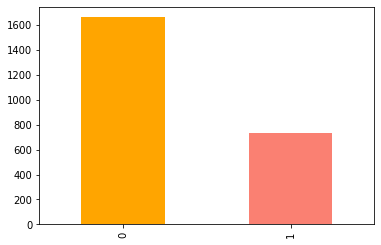

In [ ]:
df["Rainfall(0=No,1=Yes)"].value_counts().plot(kind="bar", color=["orange", "salmon"]);

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2391 entries, 0 to 2390
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Max_Temp(Celsius)          2391 non-null   float64
 1   Min_Temp(Celsius)          2391 non-null   float64
 2   Actual evaporation(mm)     2391 non-null   float64
 3   Relative Humidity(%) 9.am  2391 non-null   int64  
 4   Relative Humidity(%) 2.pm  2391 non-null   int64  
 5   Sunshine(hrs/day)          2391 non-null   float64
 6   Cloudy(hrs/day)            2391 non-null   float64
 7   Solar Radiation(cal/cm2)   2391 non-null   float64
 8   Rainfall(0=No,1=Yes)       2391 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 168.2 KB


In [ ]:

df.describe()

,Max_Temp(Celsius),Min_Temp(Celsius),Actual evaporation(mm),Relative Humidity(%) 9.am,Relative Humidity(%) 2.pm,Sunshine(hrs/day),Cloudy(hrs/day),Solar Radiation(cal/cm2),"Rainfall(0=No,1=Yes)"
count,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000
mean,30.520142,21.279632,2.753450,85.808030,65.949394,5.648202,6.498515,321.696805,0.305730
std,3.748809,5.448064,1.588967,9.968463,14.671050,3.354364,3.825488,114.965628,0.460812
min,10.500000,0.200000,0.000000,0.000000,0.000000,0.000000,0.700000,24.900000,0.000000
25%,28.200000,16.800000,2.000000,79.000000,55.000000,3.900000,3.900000,259.170000,0.000000
50%,31.200000,22.800000,3.000000,87.000000,65.000000,6.300000,5.500000,315.870492,0.000000
75%,33.400000,25.900000,4.000000,95.000000,76.000000,7.600000,8.600000,387.245000,1.000000
max,38.800000,31.800000,9.000000,100.000000,100.000000,73.000000,84.000000,3660.360000,1.000000


In [ ]:

# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,Max_Temp(Celsius),Min_Temp(Celsius),Actual evaporation(mm),Relative Humidity(%) 9.am,Relative Humidity(%) 2.pm,Sunshine(hrs/day),Cloudy(hrs/day),Solar Radiation(cal/cm2),"Rainfall(0=No,1=Yes)"
Max_Temp(Celsius),1.000000,0.731345,0.437053,-0.203983,0.085865,0.214019,-0.001715,0.465124,0.117367
Min_Temp(Celsius),0.731345,1.000000,0.332908,0.065698,0.582770,-0.154202,0.368737,0.210706,0.412786
Actual evaporation(mm),0.437053,0.332908,1.000000,-0.307579,-0.077008,0.256992,-0.113838,0.388112,-0.026213
Relative Humidity(%) 9.am,-0.203983,0.065698,-0.307579,1.000000,0.400875,-0.280867,0.270298,-0.230705,0.221095
Relative Humidity(%) 2.pm,0.085865,0.582770,-0.077008,0.400875,1.000000,-0.528353,0.626680,-0.260879,0.567155
Sunshine(hrs/day),0.214019,-0.154202,0.256992,-0.280867,-0.528353,1.000000,-0.627442,0.538343,-0.390950
Cloudy(hrs/day),-0.001715,0.368737,-0.113838,0.270298,0.626680,-0.627442,1.000000,-0.375548,0.462079
Solar Radiation(cal/cm2),0.465124,0.210706,0.388112,-0.230705,-0.260879,0.538343,-0.375548,1.000000,-0.132603
"Rainfall(0=No,1=Yes)",0.117367,0.412786,-0.026213,0.221095,0.567155,-0.390950,0.462079,-0.132603,1.000000


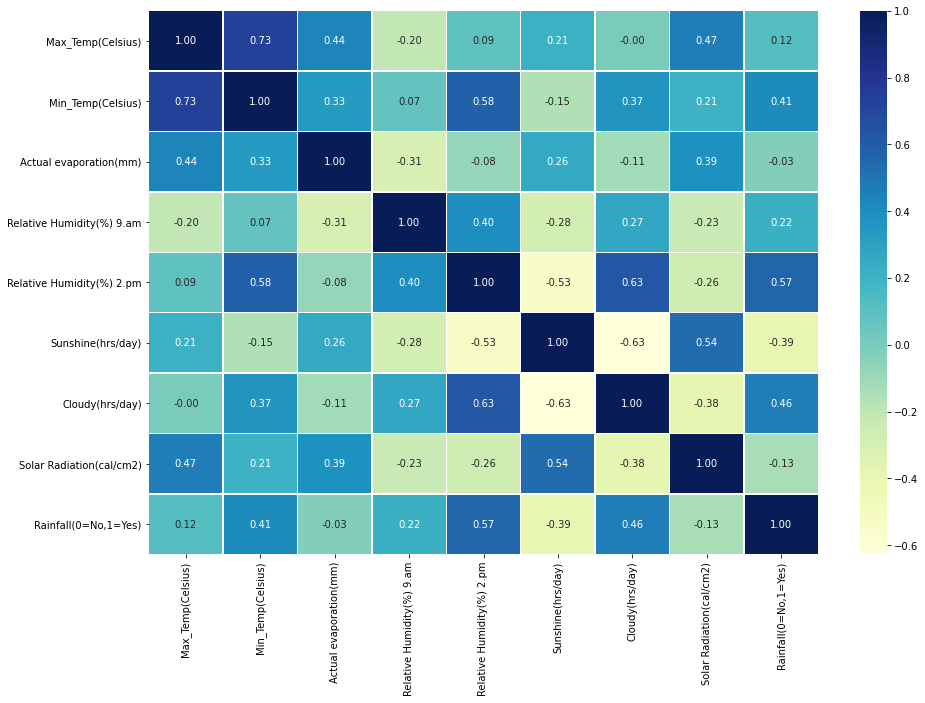

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

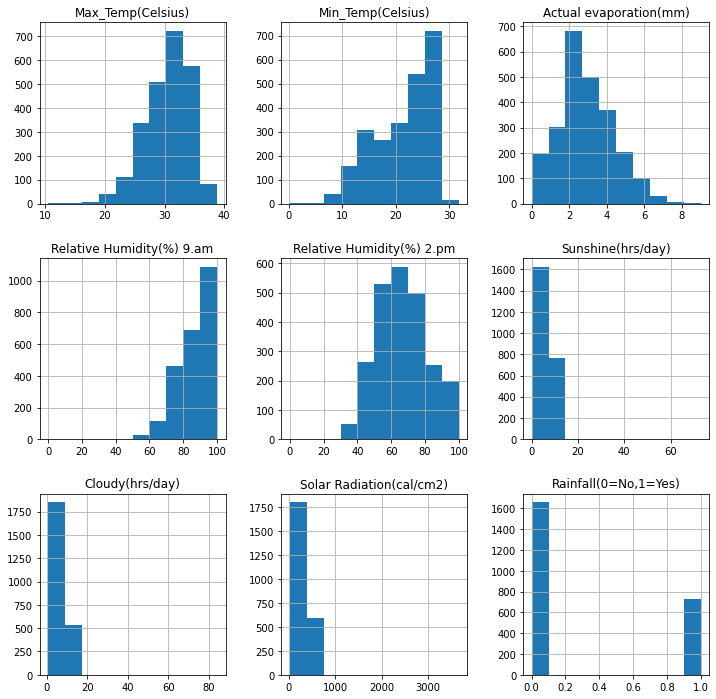

In [ ]:
df.hist(figsize = (12, 12))
plt.show()

In [ ]:
# Split data into X and y
X = df.drop("Rainfall(0=No,1=Yes)", axis=1)

y = df["Rainfall(0=No,1=Yes)"]

In [ ]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)


In [ ]:
##Logistic Regression,K-Nearest Neighbours Classifier,Random Forest Classifier
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTreeClassifier": DecisionTreeClassifier(),
          "Naive Bayes classifier": MultinomialNB()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'DecisionTreeClassifier': 0.7954070981210856,
 'KNN': 0.8162839248434238,
 'Logistic Regression': 0.8037578288100209,
 'Naive Bayes classifier': 0.7640918580375783,
 'Random Forest': 0.8622129436325678}

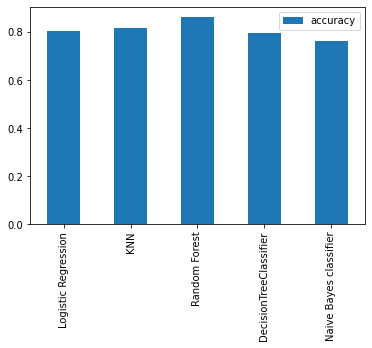

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=10)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
ytrain_pred_probablility = decision_tree.predict_proba(X_train)

ytest_pred_probablility = decision_tree.predict_proba(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))

[[293  52]
 [ 38  96]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       345
           1       0.65      0.72      0.68       134

    accuracy                           0.81       479
   macro avg       0.77      0.78      0.77       479
weighted avg       0.82      0.81      0.81       479

Accuracy score: 0.8121085594989561


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
ytrain_pred_probablility = knn_classifier.predict_proba(X_train)

ytest_pred_probablility = knn_classifier.predict_proba(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))

[[306  39]
 [ 49  85]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       345
           1       0.69      0.63      0.66       134

    accuracy                           0.82       479
   macro avg       0.77      0.76      0.77       479
weighted avg       0.81      0.82      0.81       479

Accuracy score: 0.8162839248434238


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(random_state=10)
Logistic.fit(X_train, y_train)
y_pred = Logistic.predict(X_test)
ytrain_pred_probablility = Logistic.predict_proba(X_train)

ytest_pred_probablility = Logistic.predict_proba(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))

[[306  39]
 [ 55  79]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       345
           1       0.67      0.59      0.63       134

    accuracy                           0.80       479
   macro avg       0.76      0.74      0.75       479
weighted avg       0.80      0.80      0.80       479

Accuracy score: 0.8037578288100209


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB= MultinomialNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
ytrain_pred_probablility = NB.predict_proba(X_train)

ytest_pred_probablility = NB.predict_proba(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))

[[280  65]
 [ 48  86]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       345
           1       0.57      0.64      0.60       134

    accuracy                           0.76       479
   macro avg       0.71      0.73      0.72       479
weighted avg       0.77      0.76      0.77       479

Accuracy score: 0.7640918580375783


Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
ytrain_pred_probablility = rf_model.predict_proba(X_train)

ytest_pred_probablility = rf_model.predict_proba(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))

[[313  32]
 [ 35  99]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       345
           1       0.76      0.74      0.75       134

    accuracy                           0.86       479
   macro avg       0.83      0.82      0.83       479
weighted avg       0.86      0.86      0.86       479

Accuracy score: 0.860125260960334
